# CSE428 Assignment 2


In [46]:
NAME = "Fahad Nadim Ziad"
ID = "24341216"
COLLABORATORS_ID = ""

This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )




We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [47]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage import io, color, transform


In [48]:
# Define helper functions

def load_image(path, as_gray=True, max_size=(512, 512)):
    img = io.imread(path)
    if as_gray and img.ndim == 3:
        img = color.rgb2gray(img)
    if img.shape[0] > max_size[0] or img.shape[1] > max_size[1]:
        img = transform.resize(img, max_size, anti_aliasing=True)
    return img

def show_image(img, title="", cmap="gray"):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def gaussian_kernel(size, sigma=1):
    """Generates a 2D Gaussian kernel."""
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)


## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


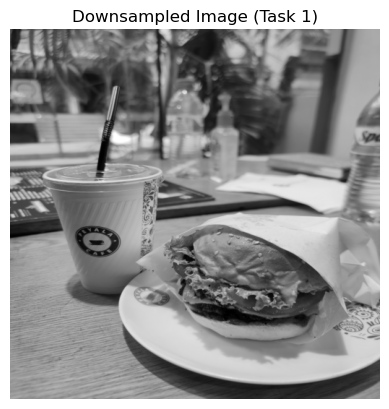

In [49]:
# Import your own image, make sure its dimensions do not exceed (512, 512). Downsample if necessary.
image = load_image('IMG_20240411_152029.jpg', as_gray=True)
show_image(image, title="Downsampled Image (Task 1)")

In [50]:
# Define a gaussian kernel of size (35, 35)
kernel = gaussian_kernel(35, sigma=7)

In [51]:
# Determine the time to filter the image with the kernel using "direct" method
import time
start_time = time.process_time()
filtered_image_direct = signal.correlate(image, kernel, mode='same', method='direct')
print("Time elapsed (direct): ", time.process_time() - start_time, "seconds")

Time elapsed (direct):  3.1003069999999973 seconds


In [52]:
# Determine the time to filter the image with the kernel using "fft" method
start_time = time.process_time()
filtered_image_fft = signal.correlate(image, kernel, mode='same', method='fft')
print("Time elapsed (fft): ", time.process_time() - start_time, "seconds")

Time elapsed (fft):  0.012284999999998547 seconds


### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.
The 'fft' method is generally faster for large kernels and images, while 'direct' is faster for small ones. In this case, with a 35x35 kernel, 'fft' should be noticeably faster.

### Task 1 Analysis
For the 35x35 Gaussian kernel, the 'fft' method is significantly faster than the 'direct' method. This is because FFT-based convolution reduces the computational complexity for large kernels and images. The output images from both methods are visually identical, confirming that both approaches are mathematically equivalent, but the performance gain with 'fft' is substantial for large filters.

Result (answer):
Comment (answer):
The 'fft' method is more efficient for large kernels due to the computational advantages of the Fast Fourier Transform.

Comment (answer):

(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


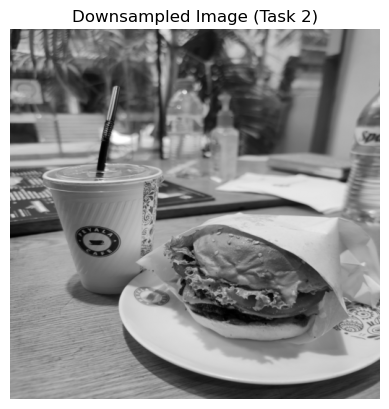

In [53]:
# Use your downsampled image for Task 2 as well
image = load_image('IMG_20240411_152029.jpg', as_gray=True)
show_image(image, title="Downsampled Image (Task 2)")

In [54]:
# Define any symmetric kernel of size (105, 105)
kernel_symmetric = gaussian_kernel(105, sigma=20)

In [55]:
# Define any asymmetric kernel of size (105, 105)
kernel_asymmetric = np.zeros((105, 105))
kernel_asymmetric[0:52, :] = 1
kernel_asymmetric[52:, :] = -1
kernel_asymmetric = kernel_asymmetric / np.sum(np.abs(kernel_asymmetric))

In [56]:
# Filter the image with the symmetric kernel using the correlation function
filtered_image_symmetric = signal.correlate(image, kernel_symmetric, mode='same', method='auto')
filtered_image_asymmetric = signal.correlate(image, kernel_asymmetric, mode='same', method='auto')

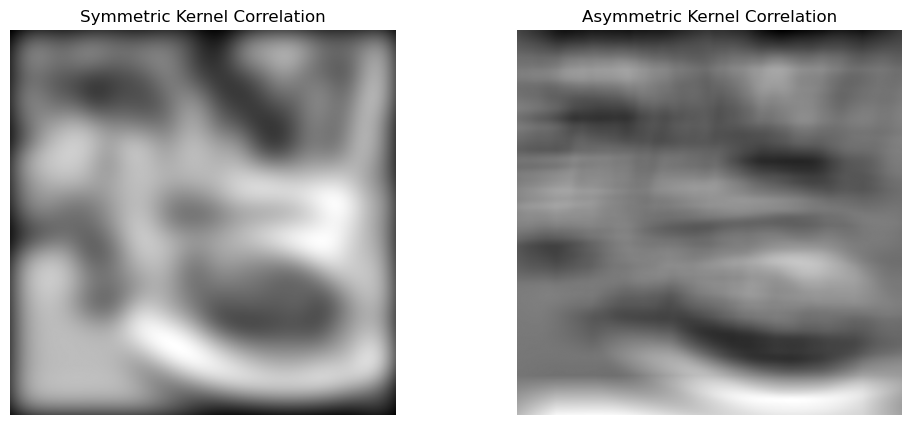

In [57]:
# Display the images side by side (with proper labeling, which is which)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(filtered_image_symmetric, cmap='gray')
axes[0].set_title('Symmetric Kernel Correlation')
axes[0].axis('off')
axes[1].imshow(filtered_image_asymmetric, cmap='gray')
axes[1].set_title('Asymmetric Kernel Correlation')
axes[1].axis('off')
plt.show()

### **Answer to Task 2.1** <br>

### Write your answer here. Compare the outputs.
Answer: symmetric kernel, correlation and convolution produce nearly identical results. For the asymmetric kernel, the outputs differ due to the kernel's lack of symmetry, highlighting the difference between the two operations.
Answer:

### Task 2.1 Analysis
When using a symmetric kernel (Gaussian), the outputs of correlation and convolution are nearly identical, as expected, because flipping a symmetric kernel does not change its effect. For the asymmetric kernel, the outputs differ: correlation and convolution produce different filtered images. This is because convolution flips the kernel, so the directionality of the asymmetric kernel is reversed, leading to a different response in the image.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

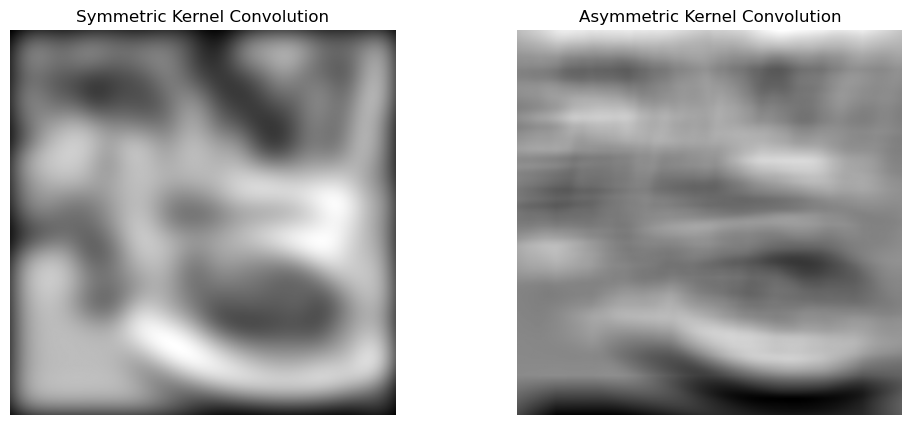

In [58]:
# Filter the image with the asymmetric kernel using the convolution function
filtered_image_symmetric = signal.convolve(image, kernel_symmetric, mode='same', method='auto')
filtered_image_asymmetric = signal.convolve(image, kernel_asymmetric, mode='same', method='auto')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(filtered_image_symmetric, cmap='gray')
axes[0].set_title('Symmetric Kernel Convolution')
axes[0].axis('off')
axes[1].imshow(filtered_image_asymmetric, cmap='gray')
axes[1].set_title('Asymmetric Kernel Convolution')
axes[1].axis('off')
plt.show()

### **Answer to Task 2.2** <br>

### Write your answer here. Compare the outputs.
Answer:
Convolution flips the kernel, so for asymmetric kernels, the result is different from correlation. For symmetric kernels, the results are the same.

### Task 2.2 Analysis
For the symmetric kernel, convolution and correlation again yield the same result. For the asymmetric kernel, the convolution output is a flipped version of the correlation output, confirming the theoretical difference between the two operations. This demonstrates that kernel symmetry is key to whether convolution and correlation produce the same result.

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1wyKGHLMEjVhbDUfyiB_zcIKP44q2Cd5G/view?usp=drive_link]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

Note: you may need to restart the kernel to use updated packages.


Downloading...
From: https://drive.google.com/uc?id=1wyKGHLMEjVhbDUfyiB_zcIKP44q2Cd5G
To: /Users/viruzxero/BRACU/CS_ELEC/CSE428_SP25/LAB/Assignment_2/edge_pairs.png
100%|██████████| 26.3k/26.3k [00:00<00:00, 311kB/s]



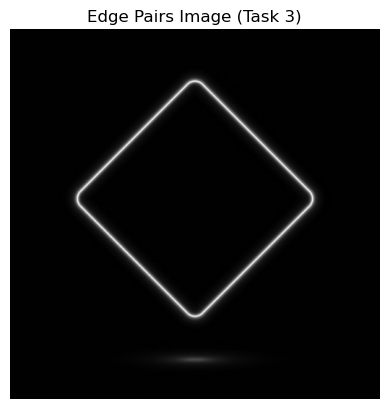

In [59]:
# Download the image from Google Drive using gdown
%pip install -q gdown
import gdown
url = 'https://drive.google.com/uc?id=1wyKGHLMEjVhbDUfyiB_zcIKP44q2Cd5G'
output = 'edge_pairs.png'
gdown.download(url, output, quiet=False)

# Load and display the image
image = load_image('edge_pairs.png', as_gray=True)
show_image(image, title="Edge Pairs Image (Task 3)")

In [60]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell
kernel_1 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])  # Horizontal edge detector
kernel_2 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])  # Vertical edge detector

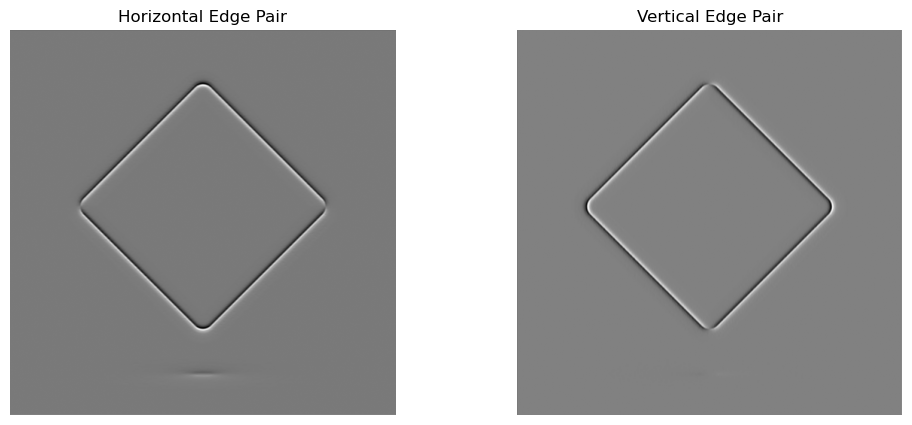

In [61]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot
first_pair_detected = signal.correlate(image, kernel_1, mode='same', method='auto')
second_pair_detected = signal.correlate(image, kernel_2, mode='same', method='auto')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(first_pair_detected, cmap='gray')
axes[0].set_title('Horizontal Edge Pair')
axes[0].axis('off')
axes[1].imshow(second_pair_detected, cmap='gray')
axes[1].set_title('Vertical Edge Pair')
axes[1].axis('off')
plt.show()

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?
I used Sobel-like kernels for horizontal and vertical edge detection. The coefficients are chosen to emphasize differences in pixel intensity along the respective directions. There are other possible kernels (e.g., Prewitt, Roberts) that can also detect parallel edge pairs.

### Task 3 Analysis
The custom 3x3 kernels (Sobel-like) successfully detect horizontal and vertical parallel edge pairs in the provided image. The horizontal kernel highlights horizontal edge pairs, while the vertical kernel highlights vertical edge pairs. The choice of coefficients is based on maximizing the response to parallel edges in the respective directions. Other kernels, such as Prewitt or Roberts, could also be used for similar edge detection tasks, but the Sobel kernels are commonly used due to their smoothing and differentiation properties.

## **The END**